In [1]:
import pandas as pd
import numpy as np
from scipy.stats import zscore
from imblearn.over_sampling import SMOTE
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
import joblib


In [2]:
data = pd.read_csv("Data.csv")
data.head()

,ACCESS_PERSONAL_INFO___,ALTER_PHONE_STATE___,ANTI_DEBUG_____,CREATE_FOLDER_____,CREATE_PROCESS`_____,CREATE_THREAD_____,DEVICE_ACCESS_____,EXECUTE_____,FS_ACCESS____,FS_ACCESS()____,...,utimes,vfork,vibrate,vibratePattern,wait4,watchRotation,windowGainedFocus,write,writev,Class
0,1,0,0,3,0,14,2,0,3,0,...,0,0,0,0,0,0,0,37,10,1
1,3,0,0,6,0,42,91,0,32,0,...,0,0,0,0,0,0,2,2838,46,1
2,2,0,0,4,0,23,3,0,17,2,...,0,0,0,0,0,0,1,111,20,1
3,1,0,0,4,0,27,9,0,36,0,...,0,0,0,0,0,0,7,987,197,1
4,3,0,0,11,0,18,3,0,16,0,...,0,0,0,0,0,0,1,98,25,1


In [3]:
data.columns

Index(['ACCESS_PERSONAL_INFO___', 'ALTER_PHONE_STATE___', 'ANTI_DEBUG_____',
       'CREATE_FOLDER_____', 'CREATE_PROCESS`_____', 'CREATE_THREAD_____',
       'DEVICE_ACCESS_____', 'EXECUTE_____', 'FS_ACCESS____',
       'FS_ACCESS()____',
       ...
       'utimes', 'vfork', 'vibrate', 'vibratePattern', 'wait4',
       'watchRotation', 'windowGainedFocus', 'write', 'writev', 'Class'],
      dtype='object', length=471)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11598 entries, 0 to 11597
Columns: 471 entries, ACCESS_PERSONAL_INFO___ to Class
dtypes: int64(471)
memory usage: 41.7 MB


In [5]:
data.describe()

,ACCESS_PERSONAL_INFO___,ALTER_PHONE_STATE___,ANTI_DEBUG_____,CREATE_FOLDER_____,CREATE_PROCESS`_____,CREATE_THREAD_____,DEVICE_ACCESS_____,EXECUTE_____,FS_ACCESS____,FS_ACCESS()____,...,utimes,vfork,vibrate,vibratePattern,wait4,watchRotation,windowGainedFocus,write,writev,Class
count,11598.000000,11598.000000,11598.000000,11598.000000,11598.000000,11598.000000,11598.000000,11598.00000,11598.000000,11598.000000,...,11598.000000,11598.000000,11598.000000,11598.000000,11598.000000,11598.000000,11598.000000,11598.000000,1.159800e+04,11598.000000
mean,57.435334,0.001207,0.044577,5.781342,0.983877,29.770391,29.641749,2.25125,73.661493,6.688395,...,0.093292,2.232454,0.001811,0.000690,6.453958,0.000690,1.647870,1071.197362,1.039598e+03,3.131919
std,444.149233,0.055703,1.104287,10.380946,4.061886,32.170379,267.652850,9.86903,219.079872,20.050449,...,1.808335,15.691146,0.070084,0.029357,164.278529,0.026256,9.927242,6151.477714,1.712849e+04,1.197716
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,1.000000
25%,0.000000,0.000000,0.000000,2.000000,0.000000,10.000000,2.000000,0.00000,8.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,71.000000,1.200000e+01,2.000000
50%,2.000000,0.000000,0.000000,3.000000,0.000000,17.000000,3.000000,0.00000,20.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,256.000000,4.400000e+01,3.000000
75%,8.000000,0.000000,0.000000,6.000000,0.000000,39.000000,21.000000,0.00000,52.000000,4.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,1142.750000,1.440000e+02,4.000000
max,7647.000000,5.000000,91.000000,700.000000,140.000000,1332.000000,26631.000000,399.00000,8380.000000,1192.000000,...,113.000000,117.000000,6.000000,2.000000,17431.000000,1.000000,1042.000000,490069.000000,1.301356e+06,5.000000


In [6]:
data.shape

(11598, 471)

In [7]:
data.Class.unique()

array([1, 2, 3, 4, 5])

In [8]:
# Check for duplicated columns by name
duplicate_column_names = data.columns[data.columns.duplicated()].tolist()

# Print results
if duplicate_column_names:
    print(f"🔁 Found {len(duplicate_column_names)} duplicated columns (by name):")
    print(duplicate_column_names)
else:
    print("✅ No duplicated column names found.")


✅ No duplicated column names found.


In [9]:
# Check for duplicate columns by comparing their values
duplicate_columns_by_value = []

# Convert DataFrame to dictionary of Series to compare values
columns_seen = {}

for col in data.columns:
    col_data = data[col]
    for seen_col, seen_data in columns_seen.items():
        if col_data.equals(seen_data):
            duplicate_columns_by_value.append(col)
            break
    else:
        columns_seen[col] = col_data

# Print results
print(f"🔁 Total columns with duplicate values: {len(duplicate_columns_by_value)}")
if duplicate_columns_by_value:
    print("Duplicate columns based on values:")
    print(duplicate_columns_by_value)
else:
    print(" No duplicate columns based on values.")


🔁 Total columns with duplicate values: 14
Duplicate columns based on values:
['endRestoreSession', 'execve', 'isBluetoothA2dpOn', 'isPackageAvailable', 'isSyncActive', 'removeStatusChangeListener', 'restorePackage', 'sched_get_priority_min', 'sched_getscheduler', 'setgroups32', 'setuid32', 'startWatchingRoutes', 'timer_create', 'updateServiceLocation']


In [10]:
# Drop duplicate columns by value
df = data.drop(columns=duplicate_columns_by_value)



In [11]:
df.shape

(11598, 457)

In [12]:

# Keep only numeric columns
numeric_df = df.select_dtypes(include=[np.number])

# Compute correlation matrix
corr_matrix = numeric_df.corr().abs()

# Get upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# Find features with correlation greater than 0.95
high_corr_features = [column for column in upper.columns if any(upper[column] > 0.80)]

# Print results
print(f"Total Highly Correlated Features (corr > 0.80): {len(high_corr_features)}")
print("Features to consider dropping:\n", high_corr_features)


Total Highly Correlated Features (corr > 0.80): 119
Features to consider dropping:
 ['EXECUTE_____', 'FS_ACCESS(CREATE__WRITE)__', 'FS_PIPE_ACCESS___', 'FS_PIPE_ACCESS(READ)___', 'TERMINATE_PROCESS', 'TERMINATE_THREAD', '__arm_nr_set_tls', 'addPeriodicSync', 'bind', 'clone', 'close', 'connect', 'dup2', 'epoll_create', 'epoll_wait', 'exit', 'exit_group', 'fchown32', 'fcntl64', 'fdatasync', 'finishDrawing', 'fork', 'fstat64', 'fsync', 'ftruncate', 'getAllNetworkInfo', 'getDataNetworkType', 'getDeviceId', 'getDisplayInfo', 'getIccSerialNumber', 'getInputDeviceIds', 'getLong', 'getMobileIfaces', 'getPackageInfo', 'getPermissionInfo', 'getProxy', 'getRingerMode', 'getSpellCheckerService', 'getSubscriberId', 'getUserData', 'getUserIcon', 'getUsers', 'getWallpaper', 'getWallpaperInfo', 'getWidthHint', 'getWifiDisplayStatus', 'geteuid32', 'getgid32', 'getpeername', 'getpid', 'getresgid32', 'getresuid32', 'getsockname', 'getuid32', 'hasNamedWallpaper', 'hasNavigationBar', 'isCameraSoundForced',

In [13]:
# Assuming you already have high_corr_features list from your previous code

# Drop the highly correlated features
df_reduced = df.drop(columns=high_corr_features)

# Confirm the new shape
print(f"New dataset shape after removing correlated features: {df_reduced.shape}")

# # OPTIONAL: Save the cleaned dataset to a new file
# df_reduced.to_csv("Data_Cleaned_HighCorrRemoved.csv", index=False)
# print("Saved cleaned dataset as: Data_Cleaned_HighCorrRemoved.csv")


New dataset shape after removing correlated features: (11598, 338)


In [14]:


# Step 1: Select only numeric features (exclude target 'Class' if present)
features_only = df_reduced.drop(columns=['Class'], errors='ignore')
numeric_features = features_only.select_dtypes(include=[np.number])

# Step 2: Compute Z-scores
z_scores = np.abs(zscore(numeric_features))

# Step 3: Identify rows with any feature having Z-score > 3
outlier_rows = (z_scores > 3).any(axis=1)

# Step 4: Count total rows with outliers
total_outliers = outlier_rows.sum()
total_rows = numeric_features.shape[0]

# Step 5: Print result
if total_outliers > 0:
    print(f" Found {total_outliers} rows with outliers out of {total_rows} total rows.")
else:
    print(" No outliers found (Z-score within ±3 for all features).")



 Found 4583 rows with outliers out of 11598 total rows.


In [15]:

# Step 1: Select numeric features (excluding target 'Class')
# features_only = df_reduced.drop(columns=['Class'], errors='ignore')
# numeric_features = features_only.select_dtypes(include=[np.number])

# Step 2: IQR-based Winsorization function
def iqr_winsorize(series):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return series.clip(lower=lower_bound, upper=upper_bound)

# Step 3: Apply winsorization to all numeric columns
winsorized_features = numeric_features.apply(iqr_winsorize)

# Step 4: Re-attach target column if exists
if 'Class' in numeric_features.columns:
    winsorized_features['Class'] = numeric_features['Class'].values

# Step 5: Display shape and confirm
print(" Outliers handled using IQR method.")
print(f" Final shape of winsorized dataset: {winsorized_features.shape}")


 Outliers handled using IQR method.
 Final shape of winsorized dataset: (11598, 337)


In [16]:
len(winsorized_features.columns.tolist())

337

In [17]:
X = winsorized_features.copy()
Y = df_reduced['Class']

In [18]:
print(X.shape)
print(Y.shape)

(11598, 337)
(11598,)


In [19]:
from collections import Counter

# Check class distribution
class_counts = Counter(Y)
print("Class Distribution:")
for cls, count in class_counts.items():
    print(f"{cls}: {count}")

Class Distribution:
1: 1253
2: 2100
3: 3904
4: 2546
5: 1795


In [20]:
from imblearn.over_sampling import SMOTE

# Apply SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, Y)

# Check new class distribution
print("\nAfter SMOTE:")
print(Counter(y_resampled))
print(Counter(X_resampled))



After SMOTE:
Counter({1: 3904, 2: 3904, 3: 3904, 4: 3904, 5: 3904})
Counter({'ACCESS_PERSONAL_INFO___': 1, 'ALTER_PHONE_STATE___': 1, 'ANTI_DEBUG_____': 1, 'CREATE_FOLDER_____': 1, 'CREATE_PROCESS`_____': 1, 'CREATE_THREAD_____': 1, 'DEVICE_ACCESS_____': 1, 'FS_ACCESS____': 1, 'FS_ACCESS()____': 1, 'FS_ACCESS(CREATE)____': 1, 'FS_ACCESS(CREATE__APPEND)__': 1, 'FS_ACCESS(CREATE__READ)__': 1, 'FS_ACCESS(CREATE__READ__WRITE)': 1, 'FS_ACCESS(CREATE__WRITE__APPEND)': 1, 'FS_ACCESS(READ)____': 1, 'FS_ACCESS(READ__WRITE)__': 1, 'FS_ACCESS(WRITE)____': 1, 'FS_PIPE_ACCESS()___': 1, 'FS_PIPE_ACCESS(READ__)_': 1, 'FS_PIPE_ACCESS(READ__WRITE)_': 1, 'FS_PIPE_ACCESS(WRITE)___': 1, 'NETWORK_ACCESS____': 1, 'NETWORK_ACCESS()____': 1, 'NETWORK_ACCESS(READ)____': 1, 'NETWORK_ACCESS(READ__WRITE)__': 1, 'NETWORK_ACCESS(READ__WRITE__)': 1, 'NETWORK_ACCESS(WRITE)____': 1, 'NETWORK_ACCESS(WRITE__)__': 1, 'SMS_SEND____': 1, '__arm_nr_cacheflush': 1, '_llseek': 1, '_newselect': 1, 'accept': 1, 'access': 1, 'a

In [21]:
from sklearn.preprocessing import StandardScaler

# Initialize scaler
scaler = StandardScaler()

# Fit and transform the resampled data
X_scaled = scaler.fit_transform(X_resampled)


In [22]:
from sklearn.model_selection import train_test_split

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y_resampled, test_size=0.2, random_state=42, stratify=y_resampled
)

# Optional: print the shape of each set
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)


X_train shape: (15616, 337)
X_test shape: (3904, 337)
y_train shape: (15616,)
y_test shape: (3904,)


In [23]:
y_test.shape

(3904,)

In [24]:
df['Class'].shape

(11598,)

In [25]:

# Train the model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [26]:
y_pred = model.predict(X_test)
y_pred

array([2, 5, 1, ..., 3, 1, 2], shape=(3904,))

In [27]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Evaluation
print(" Accuracy:", accuracy_score(y_test, y_pred))
print("\n Classification Report:\n", classification_report(y_test, y_pred))
print("\n Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

 Accuracy: 0.9690061475409836

 Classification Report:
               precision    recall  f1-score   support

           1       0.95      0.99      0.97       781
           2       0.98      0.96      0.97       780
           3       1.00      0.99      0.99       781
           4       0.98      0.93      0.96       781
           5       0.94      0.98      0.96       781

    accuracy                           0.97      3904
   macro avg       0.97      0.97      0.97      3904
weighted avg       0.97      0.97      0.97      3904


 Confusion Matrix:
 [[770   0   1   2   8]
 [ 14 746   2   6  12]
 [  0   5 773   1   2]
 [ 19   6   0 728  28]
 [  8   3   0   4 766]]


In [28]:
len(X.columns)

337

## Save the Number of features, Scaler and model

### Features Save

In [29]:
columns_str = ','.join(X.columns)
with open('features.txt','w') as file:
    file.write(columns_str)

### Scaler Save

In [30]:
# Save the scaler and model to disk
scaler_path = 'scaler.pkl'
joblib.dump(scaler, scaler_path)



['scaler.pkl']

### Model Save

In [31]:
model_path = 'random_forest_Classifier.pkl'
joblib.dump(model, model_path)

['random_forest_Classifier.pkl']

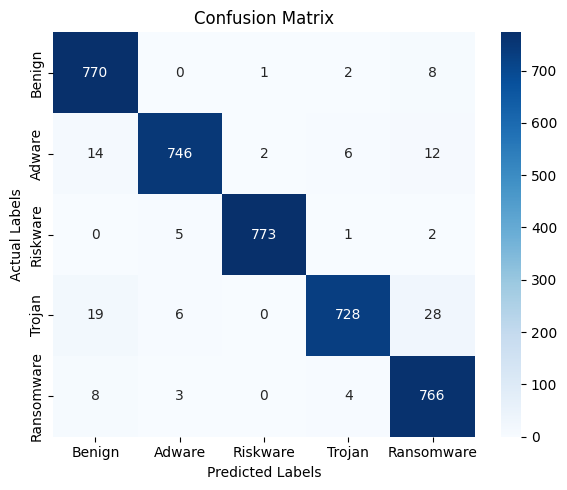

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns
# Class labels
labels = ['Benign', 'Adware', 'Riskware', 'Trojan', 'Ransomware']
confusion_matrix = confusion_matrix(y_test, y_pred)
# Plotting
plt.figure(figsize=(6, 5))
sns.heatmap(confusion_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted Labels')
plt.ylabel('Actual Labels')
plt.title('Confusion Matrix')
plt.tight_layout()
plt.show()


In [33]:
from collections import Counter

def output_data_percentage(y_pred):
    # Count occurrences
    pred_counts = Counter(y_pred)

    # Total predictions
    total_preds = sum(pred_counts.values())

    # Class label mapping
    label_mapping = {
        1: "Benign",
        2: "Adware",
        3: "Riskware",
        4: "Trojan",
        5: "Ransomware"
    }

    # Prepare result as a dictionary
    percentages = {
        label_mapping.get(cls, str(cls)): round((count / total_preds) * 100, 2)
        for cls, count in sorted(pred_counts.items())
    }

    return percentages


In [34]:
# Get predicted class labels on test set
y_pred = model.predict(X_test)
data = output_data_percentage(y_pred)
data

{'Benign': 20.77,
 'Adware': 19.47,
 'Riskware': 19.88,
 'Trojan': 18.98,
 'Ransomware': 20.9}

## Class distribution AFTER SMOTE

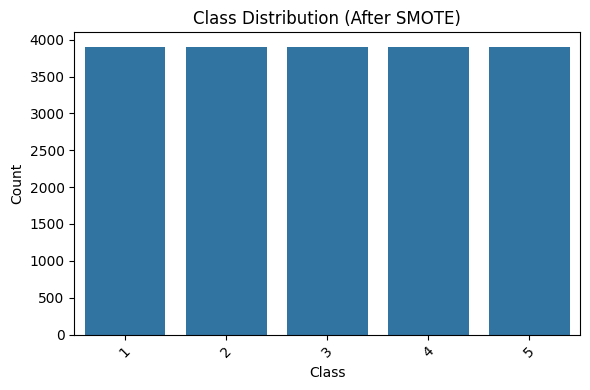

In [ ]:

combined_y = pd.concat([y_train, y_test])

plt.figure(figsize=(6, 4))
sns.countplot(x=combined_y)
plt.title("Class Distribution (After SMOTE)")
plt.xlabel("Class")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


## # Pie chart of class distribution after SMOTE

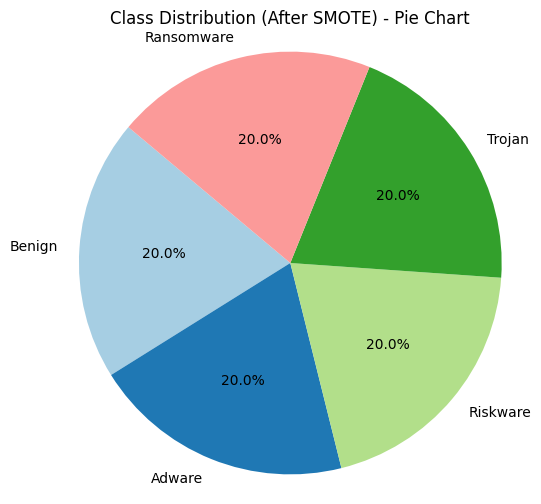

In [37]:
# Pie chart of class distribution after SMOTE
class_counts = combined_y.value_counts().sort_index()
labels = ['Benign', 'Adware', 'Riskware', 'Trojan', 'Ransomware']

plt.figure(figsize=(6, 6))
plt.pie(class_counts, labels=labels, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)
plt.title('Class Distribution (After SMOTE) - Pie Chart')
plt.axis('equal')
plt.show()


## # Assuming feature names are stored Top 10

C:\Users\HBLinks\AppData\Local\Temp\ipykernel_4756\2641962270.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importances[indices], y=np.array(feature_names)[indices], palette='viridis')


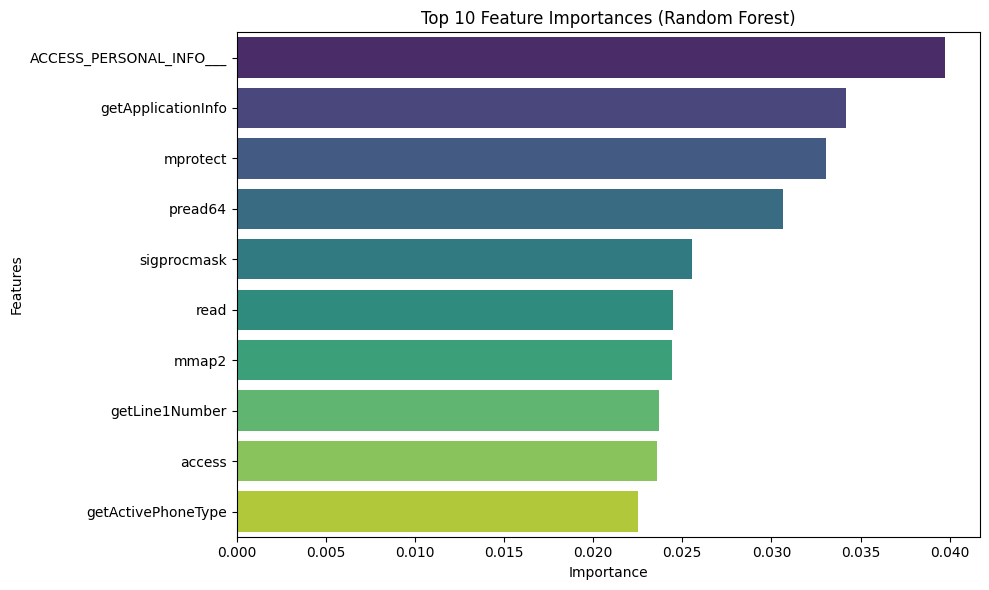

In [38]:
import pandas as pd
import numpy as np

# Assuming feature names are stored
feature_names = X.columns if isinstance(X, pd.DataFrame) else [f"Feature {i}" for i in range(X.shape[1])]

importances = model.feature_importances_
indices = np.argsort(importances)[::-1][:10]  # Top 10

plt.figure(figsize=(10, 6))
sns.barplot(x=importances[indices], y=np.array(feature_names)[indices], palette='viridis')
plt.title('Top 10 Feature Importances (Random Forest)')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.tight_layout()
plt.show()


## Classfication Report HeatMap

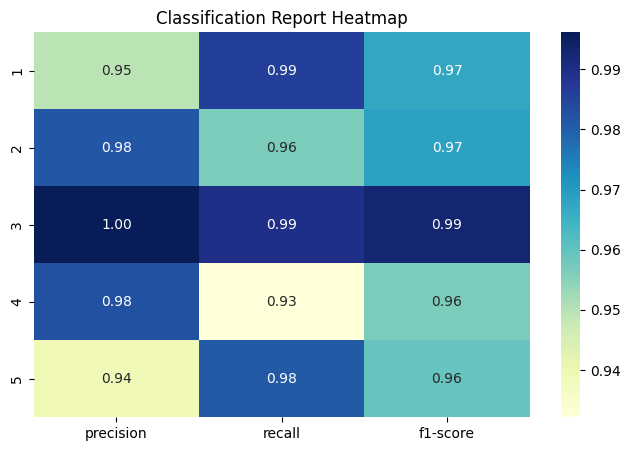

In [39]:
from sklearn.metrics import classification_report

report = classification_report(y_test, y_pred, output_dict=True)
report_df = pd.DataFrame(report).transpose().iloc[:5]  # Limit to 5 classes

plt.figure(figsize=(8, 5))
sns.heatmap(report_df.iloc[:, :-1], annot=True, cmap='YlGnBu', fmt=".2f")  # Skip 'support'
plt.title('Classification Report Heatmap')
plt.show()


## Plot histogram of max confidence per prediction

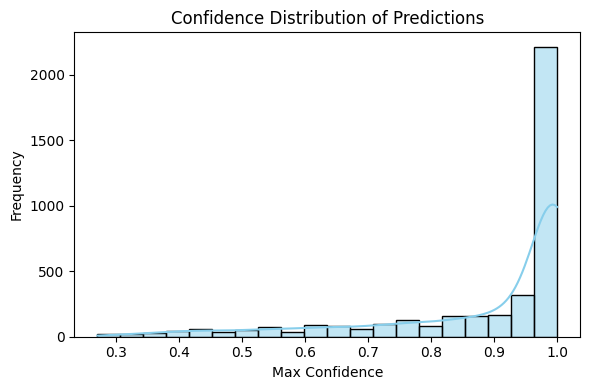

In [40]:
# Predict probabilities
y_proba = model.predict_proba(X_test)

# Plot histogram of max confidence per prediction
max_confidence = y_proba.max(axis=1)

plt.figure(figsize=(6, 4))
sns.histplot(max_confidence, bins=20, kde=True, color='skyblue')
plt.title("Confidence Distribution of Predictions")
plt.xlabel("Max Confidence")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()


## t-SNE Visulization Test


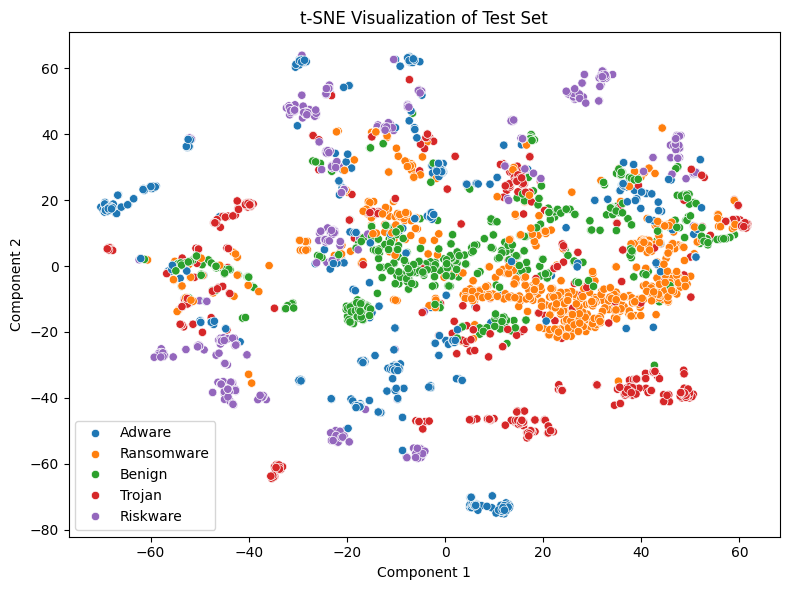

In [41]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, random_state=42)
X_embedded = tsne.fit_transform(X_test)

plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_embedded[:, 0], y=X_embedded[:, 1], hue=y_test.map({1: 'Benign', 2: 'Adware', 3: 'Riskware', 4: 'Trojan', 5: 'Ransomware'}), palette='tab10')
plt.title('t-SNE Visualization of Test Set')
plt.xlabel("Component 1")
plt.ylabel("Component 2")
plt.legend(loc='best')
plt.tight_layout()
plt.show()


## ROC Curve ( One-vs-Rest)

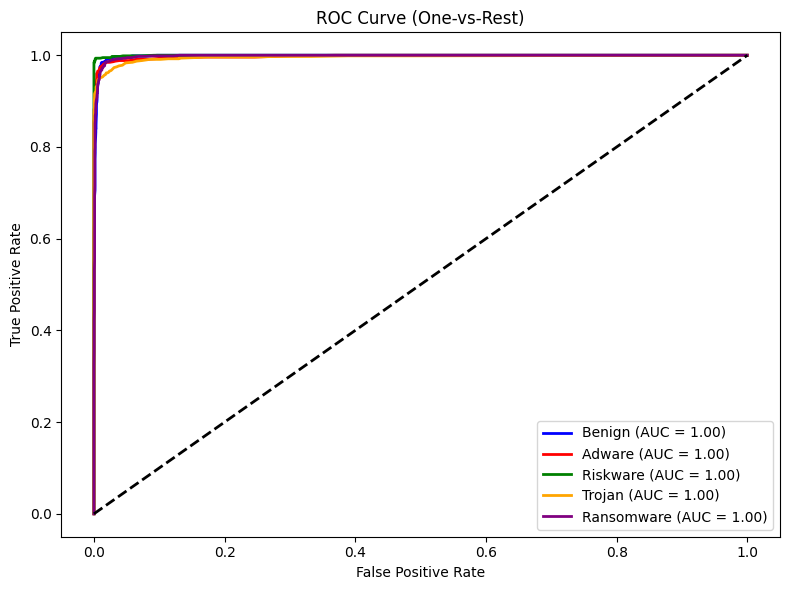

In [42]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from sklearn.ensemble import RandomForestClassifier

# Binarize the labels for multi-class ROC
y_test_bin = label_binarize(y_test, classes=[1, 2, 3, 4, 5])
n_classes = y_test_bin.shape[1]

# Predict probabilities
y_score = model.predict_proba(X_test)

fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot
plt.figure(figsize=(8, 6))
colors = ['blue', 'red', 'green', 'orange', 'purple']
labels = ['Benign', 'Adware', 'Riskware', 'Trojan', 'Ransomware']

for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2, label=f'{labels[i]} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (One-vs-Rest)')
plt.legend(loc='lower right')
plt.tight_layout()
plt.show()


## Precision VS Recall Curve

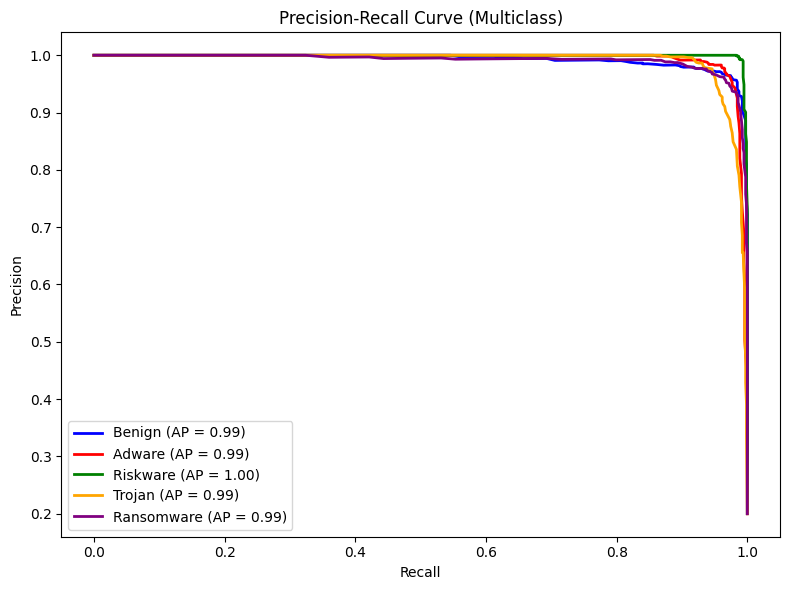

In [43]:
from sklearn.metrics import precision_recall_curve, average_precision_score

precision = dict()
recall = dict()
average_precision = dict()

for i in range(n_classes):
    precision[i], recall[i], _ = precision_recall_curve(y_test_bin[:, i], y_score[:, i])
    average_precision[i] = average_precision_score(y_test_bin[:, i], y_score[:, i])

# Plot
plt.figure(figsize=(8, 6))
for i, color in zip(range(n_classes), colors):
    plt.plot(recall[i], precision[i], color=color, lw=2,
             label=f'{labels[i]} (AP = {average_precision[i]:.2f})')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve (Multiclass)')
plt.legend(loc='best')
plt.tight_layout()
plt.show()


##  Per-Class F1 Score Comparison

C:\Users\HBLinks\AppData\Local\Temp\ipykernel_4756\1594159006.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=labels, y=f1_scores, palette='coolwarm')


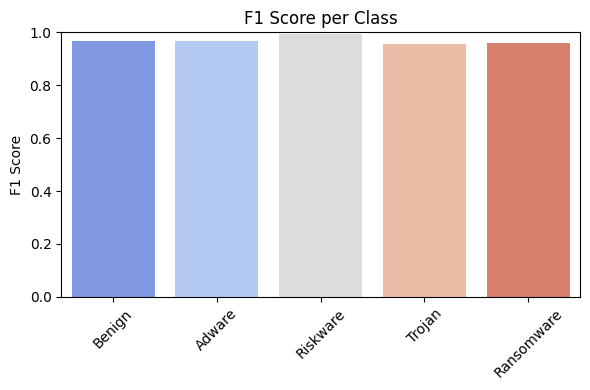

In [45]:
from sklearn.metrics import classification_report

report = classification_report(y_test, y_pred, output_dict=True)
f1_scores = [report[str(i)]['f1-score'] for i in range(1, 6)]

plt.figure(figsize=(6, 4))
sns.barplot(x=labels, y=f1_scores, palette='coolwarm')
plt.title("F1 Score per Class")
plt.ylabel("F1 Score")
plt.ylim(0, 1)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


## Feature Importance (Random Forest)

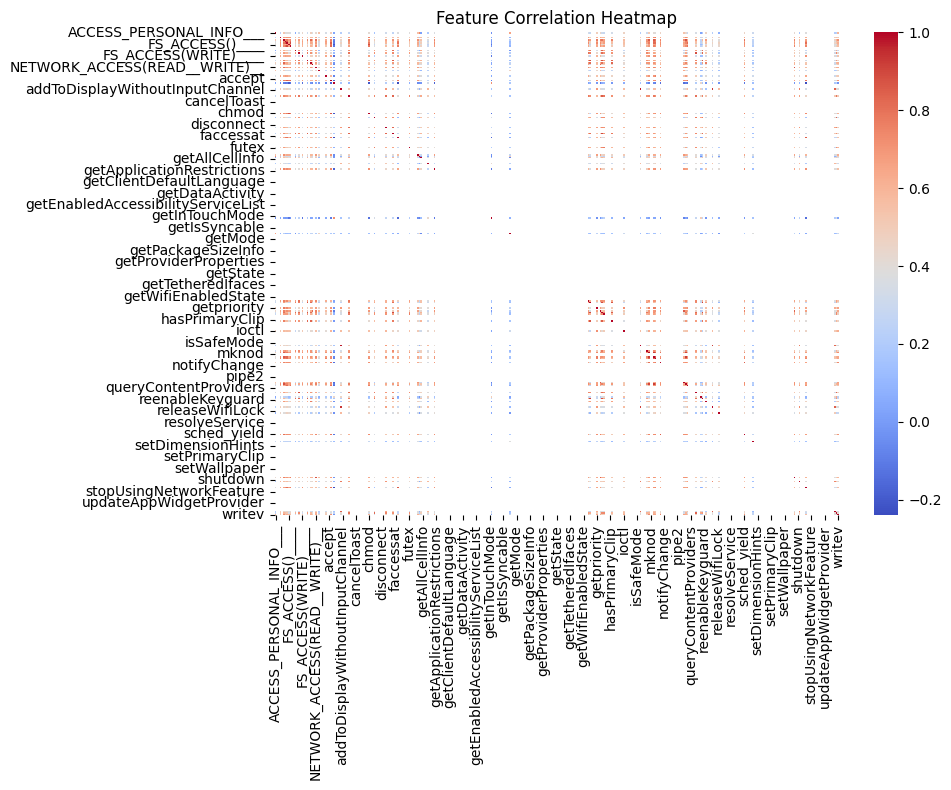

In [46]:
# If X is a DataFrame
if isinstance(X, pd.DataFrame):
    plt.figure(figsize=(10, 8))
    sns.heatmap(X.corr(), cmap='coolwarm', annot=False)
    plt.title('Feature Correlation Heatmap')
    plt.tight_layout()
    plt.show()


## Class Prediction Distribution on Test Set

C:\Users\HBLinks\AppData\Local\Temp\ipykernel_4756\580776962.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=labels, y=pred_dist.values, palette="Set2")


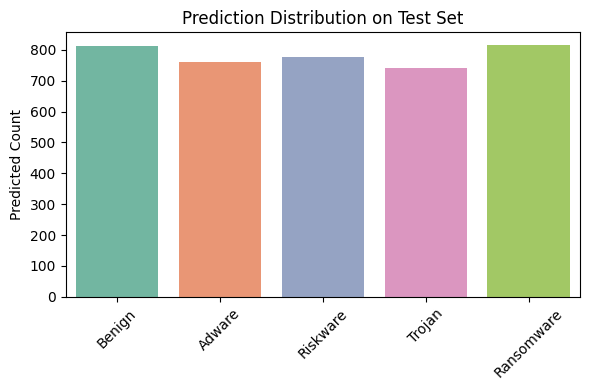

In [48]:
y_pred_series = pd.Series(y_pred)
pred_dist = y_pred_series.value_counts().sort_index()

plt.figure(figsize=(6, 4))
sns.barplot(x=labels, y=pred_dist.values, palette="Set2")
plt.title("Prediction Distribution on Test Set")
plt.ylabel("Predicted Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


## Class-wise Probability Confidence (Correct vs Incorrect)

C:\Users\HBLinks\AppData\Local\Temp\ipykernel_4756\641920398.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Correct', y='Confidence', data=df_conf, palette='Set1')


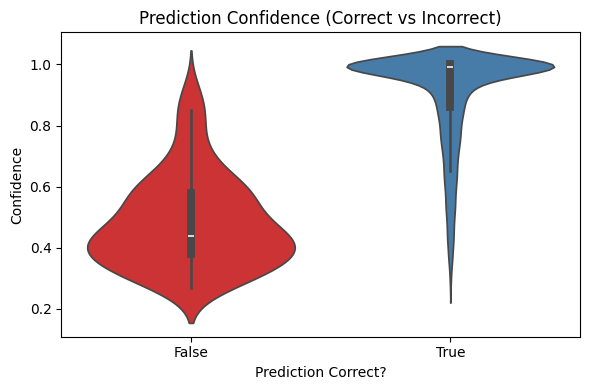

In [49]:
import pandas as pd

# Get predicted probabilities and most confident prediction
y_proba = model.predict_proba(X_test)
max_proba = np.max(y_proba, axis=1)
is_correct = y_test.values == y_pred

df_conf = pd.DataFrame({
    'Correct': is_correct,
    'Confidence': max_proba
})

plt.figure(figsize=(6, 4))
sns.violinplot(x='Correct', y='Confidence', data=df_conf, palette='Set1')
plt.title("Prediction Confidence (Correct vs Incorrect)")
plt.xlabel("Prediction Correct?")
plt.ylabel("Confidence")
plt.tight_layout()
plt.show()


## Class Frequency vs Accuracy Comparison

C:\Users\HBLinks\AppData\Local\Temp\ipykernel_4756\2680308546.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=labels, y=class_accuracy, palette="coolwarm")


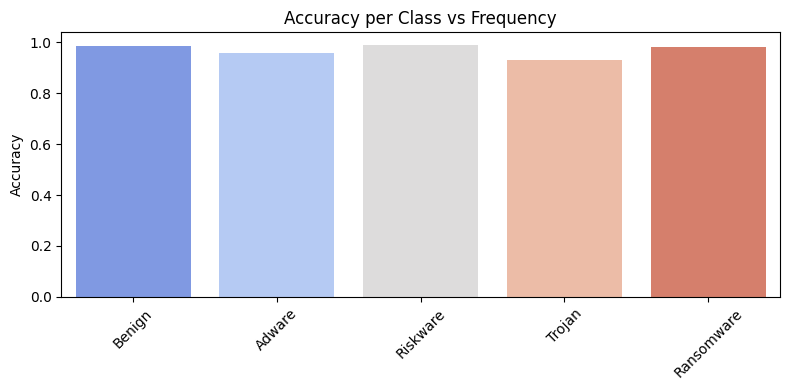

In [50]:
from sklearn.metrics import accuracy_score

class_accuracy = []
class_counts = []

for class_label in np.unique(y_test):
    idx = (y_test == class_label)
    acc = accuracy_score(y_test[idx], y_pred[idx])
    class_accuracy.append(acc)
    class_counts.append(sum(idx))

plt.figure(figsize=(8, 4))
sns.barplot(x=labels, y=class_accuracy, palette="coolwarm")
plt.title("Accuracy per Class vs Frequency")
plt.ylabel("Accuracy")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


<Figure size 600x600 with 0 Axes>

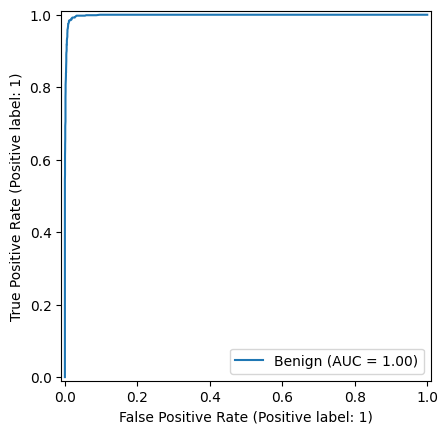

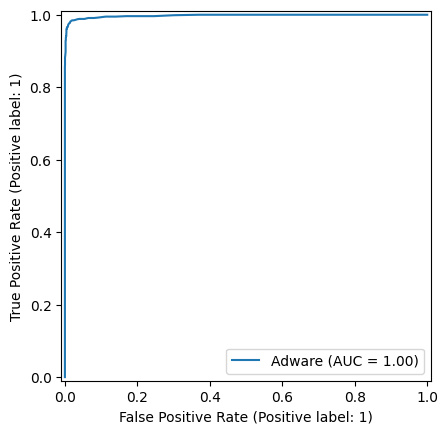

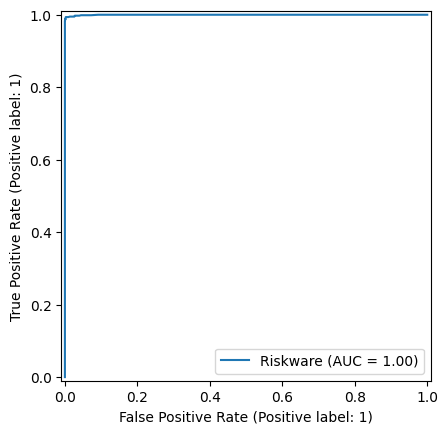

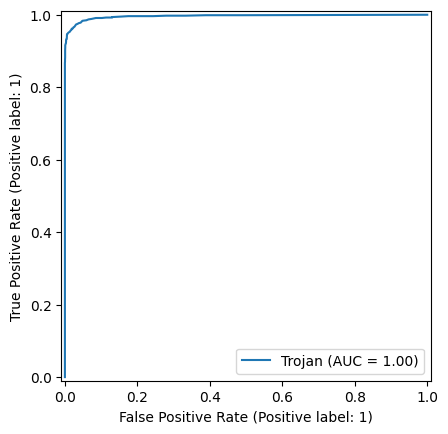

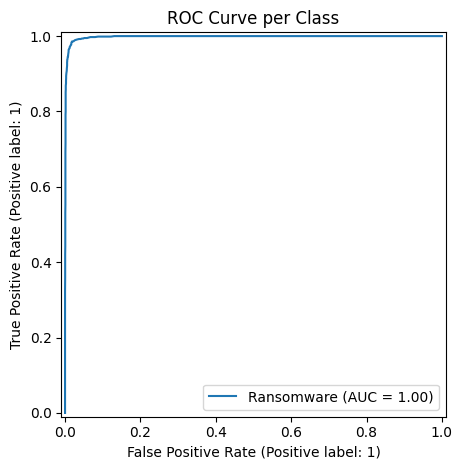

In [51]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import RocCurveDisplay

# You can reuse `y_score` from earlier
plt.figure(figsize=(6, 6))
for i in range(n_classes):
    RocCurveDisplay.from_predictions(y_test_bin[:, i], y_score[:, i], name=labels[i])

plt.title("ROC Curve per Class")
plt.tight_layout()
plt.show()


# Extra works

In [ ]:
with open("features.txt", "r") as f:
    selected_features = (f.readline()).split(',')

# selected_features

In [ ]:
df = pd.read_csv("Data.csv")

In [ ]:
missing = [feature for feature in selected_features if feature not in df.columns]
missing

[]

In [ ]:
X = df[selected_features]

In [ ]:
X.shape

(11598, 337)